In [ ]:
#주성분 분석

앞에서 배운 과일 사진에는 10000개의 픽셀이 있었기에 10000개의 특성을 가지고 있었다.

머신러닝에서는 이런 특성을 차원이라 부르며, 10000개의 특성을 결국 10000개의 차원이라는 소리다. 이 차원을 줄일 수 있다면 저장 공간을 크게 절약할 수 있기에 이를 위해 비지도 학습 작업 중 하나인 차원 축소 알고리즘을 다뤄보자.

차원 축소는 데이터를 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법이다.

또한 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이며 복원할 수 있다.

차원 축소 알고리즘 중 대표적인 주성분 분석(PCA)를 배워보자.

-주성분 분석 소개

주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있다. 주성분 벡터는 원본 데이터에 있는 어떤 방향이다. 따라서 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다. 하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있다.

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-05-23 13:08:44--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-23 13:08:44--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-23 13:08:45--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.decomposition import PCA #decomposition : 분해
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [ ]:
print(pca.components_.shape) #components : 구성 요소들

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio = 1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols,
                          figsize = (cols*ratio, rows*ratio), squeeze = False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10 + j], cmap = 'gray_r')
      axs[i,j].axis('off')
  plt.show()

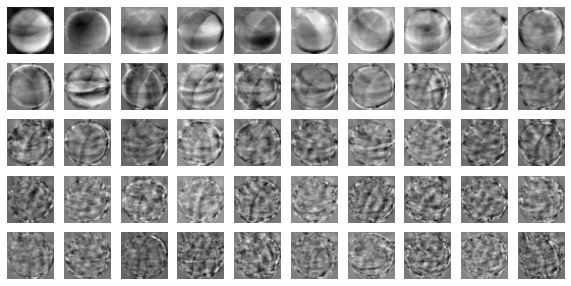

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


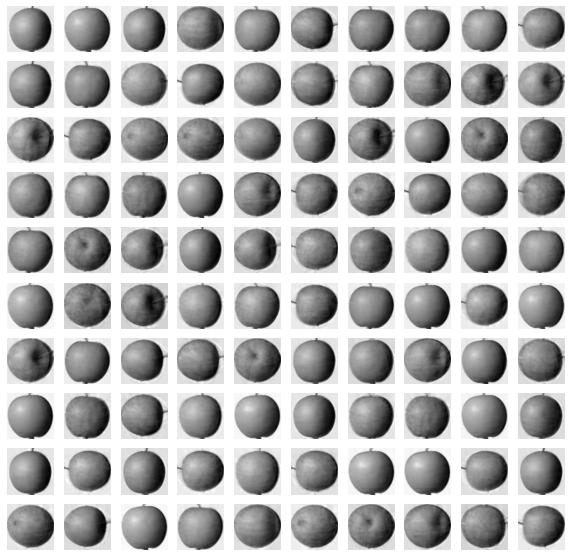

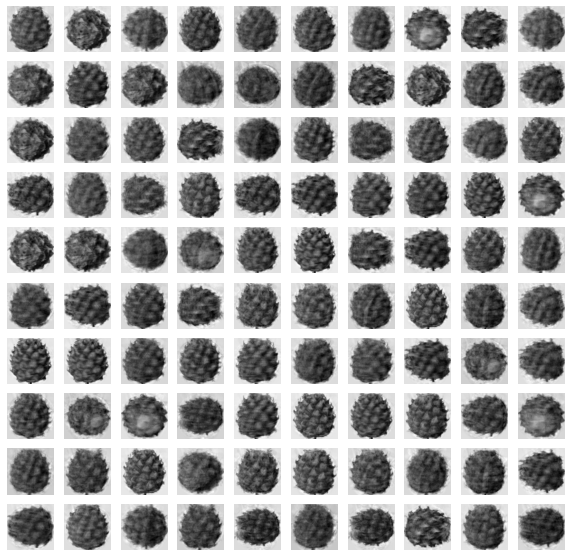

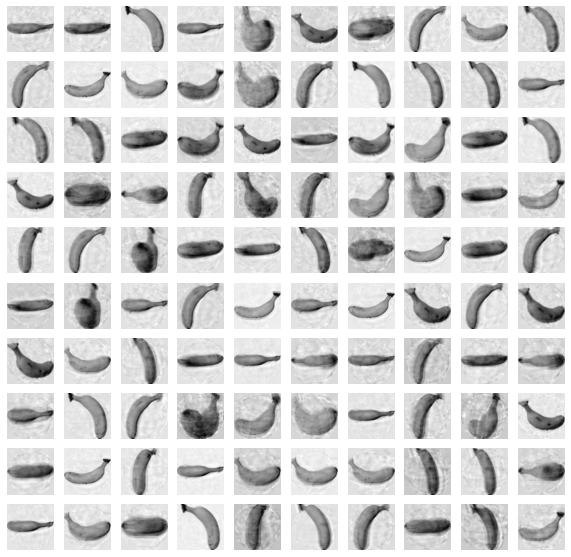

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

설명된 분산
-주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산이라고 한다.


In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9215050540867957


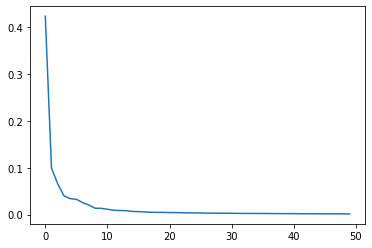

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.4439326763153075


In [ ]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [ ]:
print(pca.n_components_)

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9933333333333334
0.08946762084960938


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


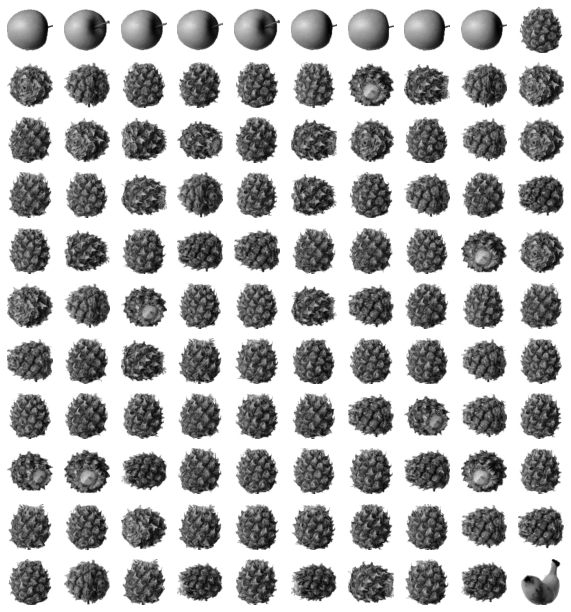

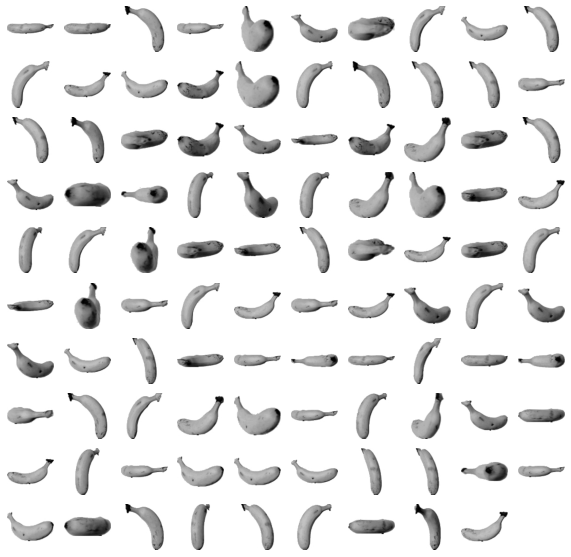

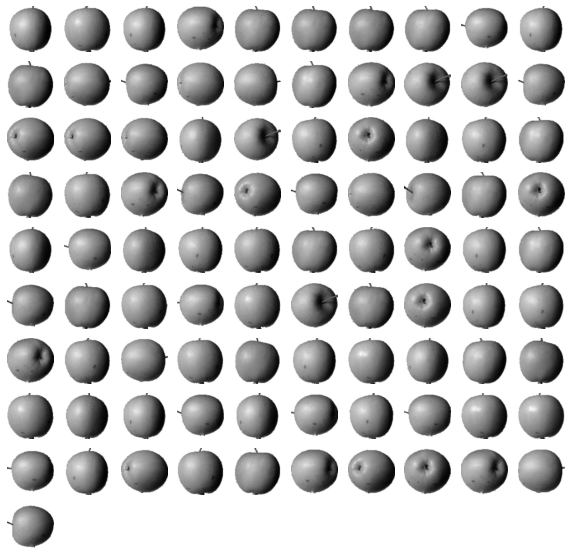

In [ ]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

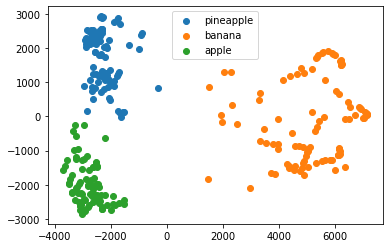

In [ ]:
for label in range(0,3):
  data = fruits_pca[km.labels_== label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()